In [1]:
import os
import pandas as pd

import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 150

import matplotlib.pyplot as plt

from model.hsa_gams import create_gams

# Check GAMs

In [2]:
path = "data/synthetic"
p = lambda f: os.path.join(path, f)
#
base_year = 2020
pop = pd.read_csv(p("demographic_factors.csv"))
pop = pop[pop["variant"] == "principal"][["sex", "age", str(base_year)]] \
  .rename(columns = {str(base_year): "base_year", "age": "age"})
pop["age"] = pop["age"].clip(upper = 90)
pop = pop.groupby(["sex", "age"]).agg("sum").reset_index()

In [3]:
def plot_hsa(df, gams, sex, hsagrp):
  plot_df = df[(df.sex == sex) & (df.hsagrp == hsagrp)]
  x = plot_df.age
  y1 = plot_df.activity_rate
  y2 = gams[(hsagrp, sex)].predict(x)
  #
  plt.plot(x, y1, "k.", label = "actual")
  plt.plot(x, y2)
  plt.title(f"{hsagrp} - {sex}")
  plt.show()

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |#######################

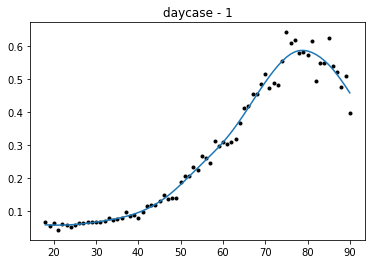

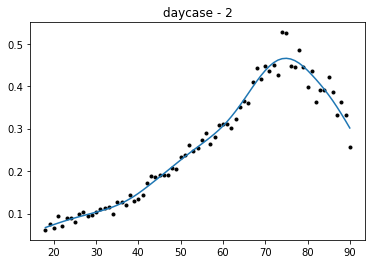

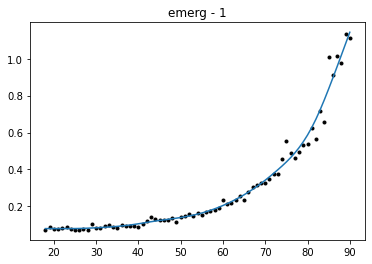

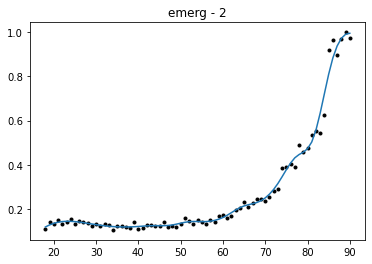

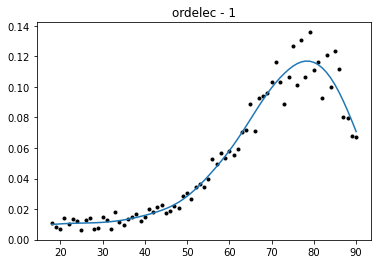

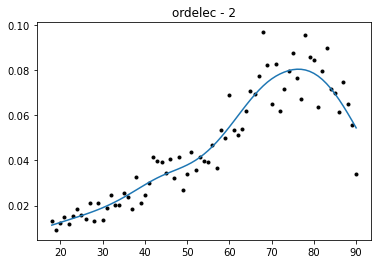

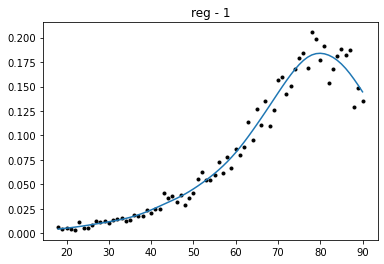

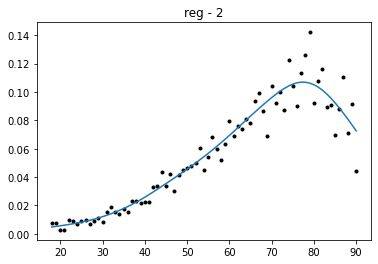

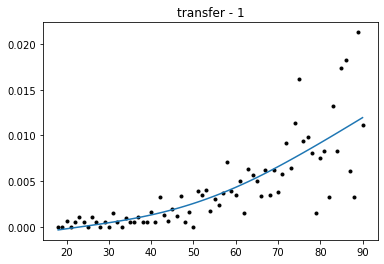

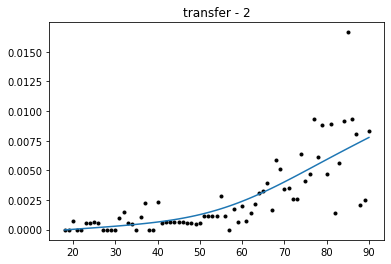

In [4]:
ip_df, ip_gams = create_gams(p, pop, "ip", ["birth", "paeds", "maternity"])
_ = [plot_hsa(ip_df, ip_gams, s, h) for h, s in ip_gams.keys()]

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:  00:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:  00:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 36% (4 of 11) |#########               

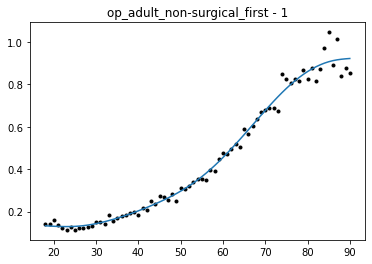

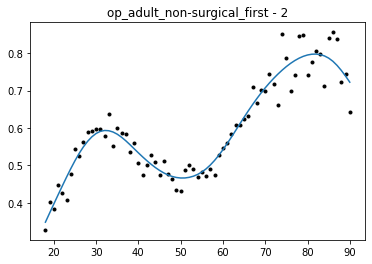

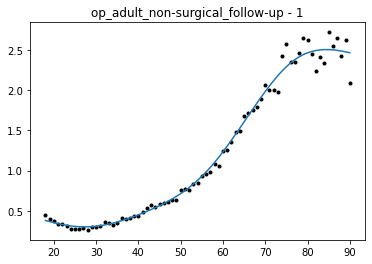

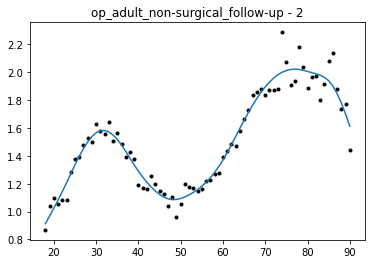

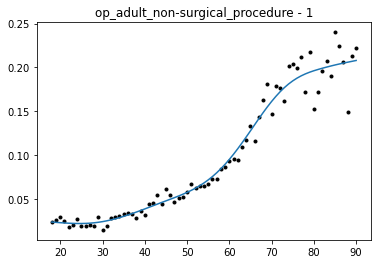

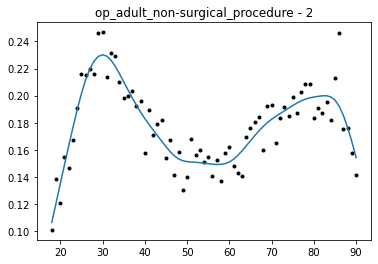

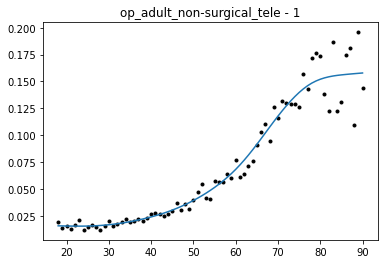

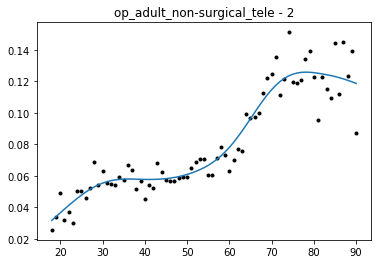

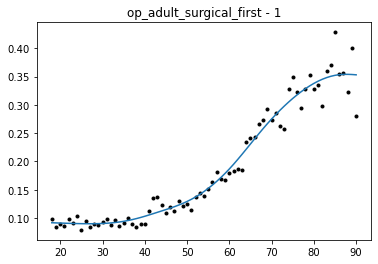

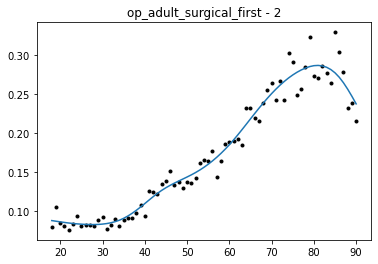

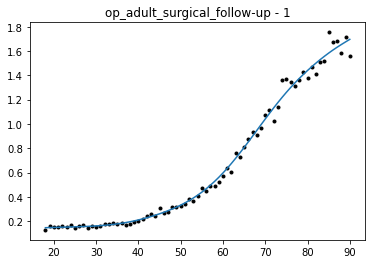

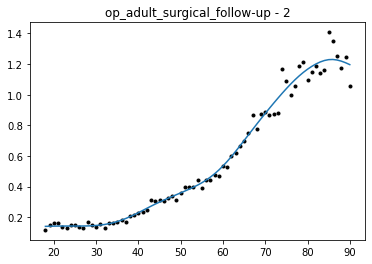

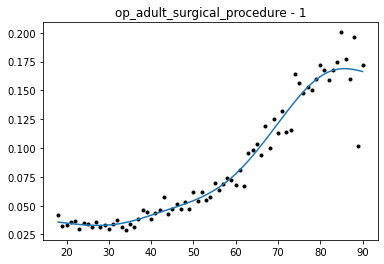

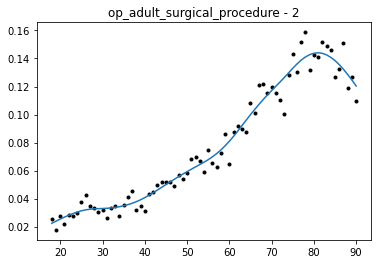

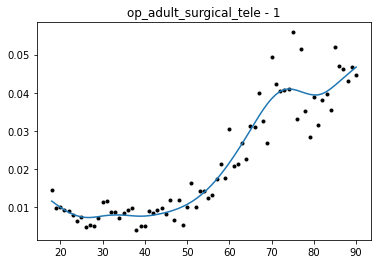

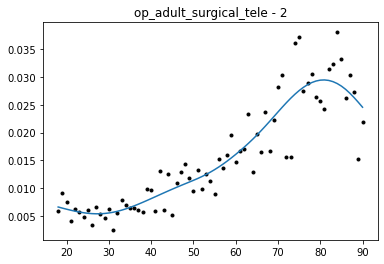

In [5]:
op_df, op_gams = create_gams(p, pop, "op")
_ = [plot_hsa(op_df, op_gams, s, h) for h, s in op_gams.keys()]